#สมาชิกกลุ่ม 3 

1. นายธนศักดิ์ จันทรัตน์ 6223200004
2. นายรัตนากร อักษรวรรณ 6223200011
3. นายนิวัฒน์ รัตนสาคร 6223200014
4. นายจรัญ รักญาติ 6223200025
5. นายพชร เอียมโมฬี 6223200029
6. นายธีรศักดิ์ จันทร์แมน 6223220001
7. มนปพร ชัยวาณิชยา 6324220002
8. ปัญจรัตน์ ยุบลชิตร 63042000008

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
import numpy as np
from skimage import io

In [ ]:
url_sky = "/content/drive/MyDrive/AI 2022/skyimg.jpeg"
img      = io.imread(url_sky) 
io.imsave('skyimg.jpg',img)

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
skyimg = cv2.imread('skyimg.jpg')
skyimg = cv2.cvtColor(skyimg, cv2.COLOR_BGR2RGB)
skyimg.shape


(417, 626, 3)

In [ ]:
h,w,c = phat.shape

phat.shape

(120, 100, 3)

In [ ]:
listName = ["J.Theerasak","J.Thanasak","A.Rattanakorn","Y.Punjarat","E.Phatchara","R.Nivat","C.Manapaporn","R.Charan"];
listId = ["6223220001","6223200004","6223200011","630420008","6223200029","6223200014","6324220002","6223200025"];
stackTest = [];

for i in range(len(listName)) :
  path = "/content/drive/MyDrive/AI 2022/" + (listName[i].split("."))[1] + ".jpg"
  img      = io.imread(path) 
  io.imsave(listName[i]+'.jpg',img)
  img = cv2.imread(listName[i]+'.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img.shape
  resized_img = cv2.resize(img,(100,120) , interpolation = cv2.INTER_AREA)
  resized_img.shape
  phat = resized_img.copy()
  cv2.putText(phat,listName[i],(0,25),cv2.FONT_HERSHEY_DUPLEX,0.3,(0,0,139),1)
  cv2.putText(phat,listId[i],(0,40),cv2.FONT_HERSHEY_DUPLEX,0.3,(0,0,139),1)
  pass

  if(i != len(listName) - 1): # normal case 
    stackTest.append(phat)
  else: # last item
    height, width = phat.shape[:2]

    rotation_matrix = cv2.getRotationMatrix2D((0.5*width, 0.5*height), 35, 0.65)

    rotation_matrix
    rotated_image = cv2.warpAffine(phat, rotation_matrix, (width, height))
    stackTest.append(rotated_image)




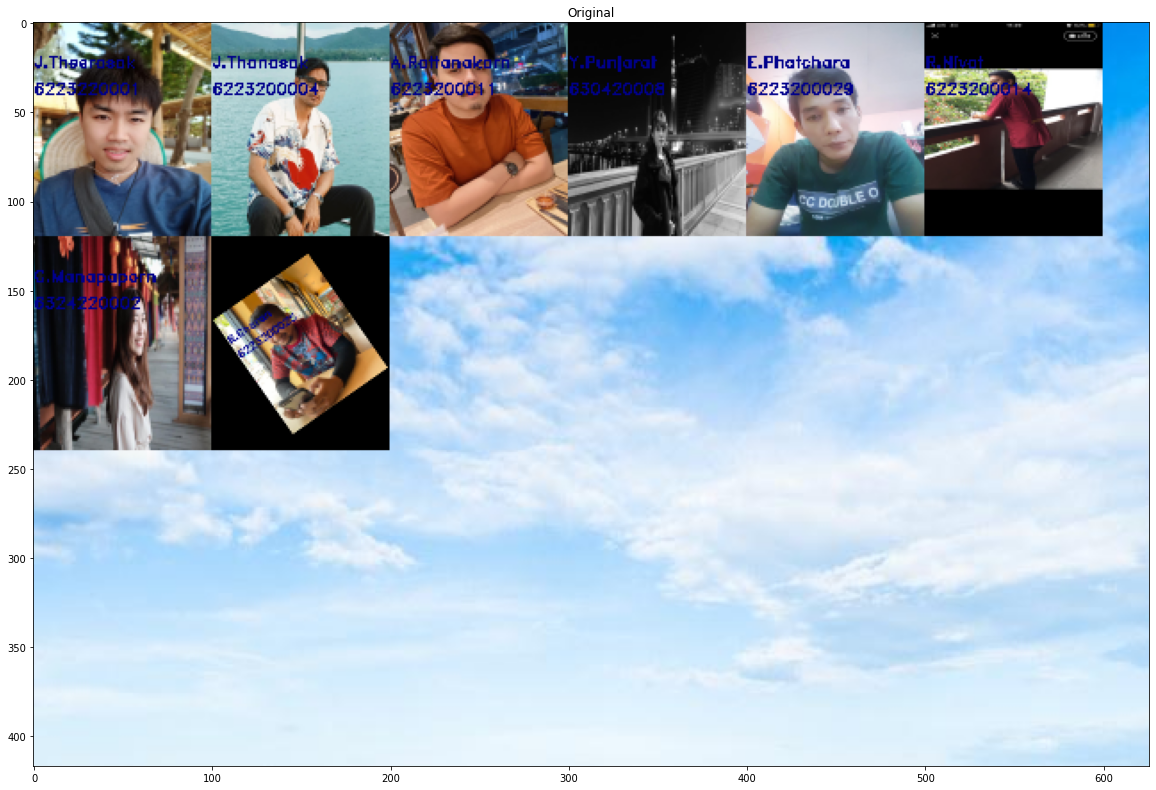

In [ ]:
skyimg = cv2.imread('skyimg.jpg')
skyimg = cv2.cvtColor(skyimg, cv2.COLOR_BGR2RGB)

Step = 100
#stack picture part
stackWidth = 0;
stackHeight = 0;
curCount = 0;

skyimgx = skyimg.copy()

# for i in range(len(listName)) :
#       skyimgx[0:h,0+Step*i:Step*i+w,:] = stackTest[i];

for i in range(len(listName)) :
    if(stackWidth >= 600) : 
        if(stackWidth == 600):
          curCount = 0
          skyimgx[120:120 + h,Step*curCount:Step*curCount+w,:] = stackTest[i];
          curCount = curCount + 1;
          stackWidth = stackWidth + Step;
        else :
          skyimgx[120:120 + h,Step*curCount:Step*curCount+w,:] = stackTest[i];
          curCount = curCount + 1;
          stackWidth = stackWidth + Step;
    else : 
      skyimgx[0:h,Step*curCount:Step*curCount+w,:] = stackTest[i];
      curCount = curCount + 1;
      stackWidth = stackWidth + Step;


plt.figure(figsize=(20, 20))
plt.subplot(1, 1.5, 1)
plt.title("Original")
plt.imshow(skyimgx)